In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv ('/content/drive/MyDrive/Orders/matches.csv',error_bad_lines=False)
df = pd.DataFrame(data, columns= ['home_team','away_team','home_score'])
df

<ipython-input-3-747f00e92c93>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv ('/content/drive/MyDrive/Orders/matches.csv',error_bad_lines=False)


,home_team,away_team,home_score
0,France,Croatia,4
1,Belgium,England,2
2,Croatia,England,2
3,France,Belgium,1
4,Sweden,England,0
...,...,...,...
895,Argentina,France,1
896,Yugoslavia,Brazil,2
897,Romania,Peru,3
898,United States,Belgium,3


In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
B=nx.Graph()
home_team=df['home_team']
away_team=df['away_team']
print('Đội nhà ', home_team.nunique())
print('Đội khách', away_team.nunique())
print('Số cạnh', len(df))

Đội nhà  81
Đội khách 85
Số cạnh 900


In [ ]:
for index, row in df.iterrows():
    B.add_edge(row['home_team'], row['away_team'], weight=1)
B.add_nodes_from(home_team, bipartite=0)
B.add_nodes_from(away_team, bipartite=1)

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=150)
nx.draw_networkx(B, pos=nx.drawing.layout.bipartite_layout(B, home_team), font_size=8, width=0.4)

In [ ]:
import networkx as nx
graph = nx.from_pandas_edgelist(
    df,
    source="home_team",
    target="away_team",
    edge_attr=["home_score"],
    create_using=nx.DiGraph
)
n_nodes = graph.number_of_nodes()
n_edges = graph.number_of_edges()

In [ ]:
print("Tổng số Nodes:", n_nodes)
print("Tổng số Egdes:", n_edges)

Tổng số Nodes: 85
Tổng số Egdes: 709


In [ ]:
stats = pd.DataFrame(graph.nodes())
stats.columns = ['Node']


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
pos = nx.spring_layout(graph,k=0.15, iterations=20)
plt.figure(figsize=(8,8))
edge_width = [0.1*graph[u][v]['home_score'] for u,v in graph.edges()]
nx.draw(graph,pos, node_size = 50, node_color = 'sandybrown',
          alpha=0.7, edge_color='mediumseagreen', with_labels= False , width=True)
plt.show()

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,8), dpi=100)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=40, cmap='Set3', node_color=list(nx.betweenness_centrality(graph).values()), nodelist=nx.betweenness_centrality(graph).keys())
edges = nx.draw_networkx_edges (graph, pos, alpha=0.2, edge_color='black', width=edge_width)
plt.colorbar(nodes)
plt.axis('off')
plt.show()

In [ ]:
betweenness_centrality = [v for k , v in nx.betweenness_centrality_subset ( graph , graph.nodes , graph.nodes ) .items ( )]
stats[ 'Betweenness' ] = betweenness_centrality
stats_betweenness_centrality = stats [['Node' , 'Betweenness']]
stats_betweenness_centrality.sort_values ( by = 'Betweenness',ascending = False ).head(10)

,Node,Betweenness
7,8,906.670967
15,2,879.712819
0,26,817.343728
10,46,665.593277
39,44,508.719361
2,5,464.499448
21,75,384.545388
48,79,378.275156
11,42,368.278287
19,24,326.074715


In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,8), dpi=100)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=40, cmap='summer', node_color=list(nx.closeness_centrality(graph).values()), nodelist=nx.closeness_centrality(graph).keys())
edges = nx.draw_networkx_edges (graph, pos, alpha=0.2, edge_color='darkorange', width=edge_width)
plt.colorbar(nodes)
plt.axis('off')
plt.show()

In [ ]:
closeness_centrality = [v for k , v in nx.closeness_centrality(graph.reverse(), wf_improved=False ).items()]
stats[ 'closeness' ] = closeness_centrality
stats_closeness_centrality = stats [['Node' , 'closeness']]
stats_closeness_centrality.sort_values ( by = 'closeness',ascending = False ).head(10)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,8), dpi=100)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=40, cmap='twilight', node_color=list(nx.pagerank(graph).values()), nodelist=nx.pagerank(graph).keys())
edges = nx.draw_networkx_edges (graph, pos, alpha=0.2, edge_color='lightcoral', width=edge_width)
plt.colorbar(nodes)
plt.axis('off')
plt.show()

In [ ]:
pagerank = [v for k , v in nx.pagerank(graph) .items ( )]
stats[ 'Pagerank' ] = pagerank
stats_pagerank= stats [['Node' , 'Pagerank']]
stats_pagerank.sort_values ( by ='Pagerank',ascending = False ).head(10)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms.community.centrality import girvan_newman
cluster = girvan_newman(graph)
node_groups = next(cluster)
n =len(node_groups)
print ('Number Community:' + str(n))
for i in range (n):
  print('Communities' + str(i) + ':' + str(node_groups[i]))


In [ ]:
color = list(np.random.choice(range(256), size = n+1))
color_node =[]
dict ={}
for node in graph:
  for i in range (n):
    if node in node_groups[i]:
      color_node.append(color[i])
      dict.update({node:color[i]})
      break
color_edge = []
for edge in graph.edges:
  i = dict.get(edge[0])
  j = dict.get(edge[0])
  if (i==j):
    color_edge.append(i)
  else:
      color_edge.append(color[n])
plt.figure(figsize=(8,8))
edge_width = [0.1*graph[u][v]['home_score'] for u,v in graph.edges()]
nx.draw(graph,pos, node_size = 50, node_color = color_node, alpha=0.7, edge_color= color_edge, with_labels=False, width = edge_width)
plt.show()


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['home_team']= label_encoder.fit_transform(df['home_team'])
df['away_team']= label_encoder.fit_transform(df['away_team'])
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

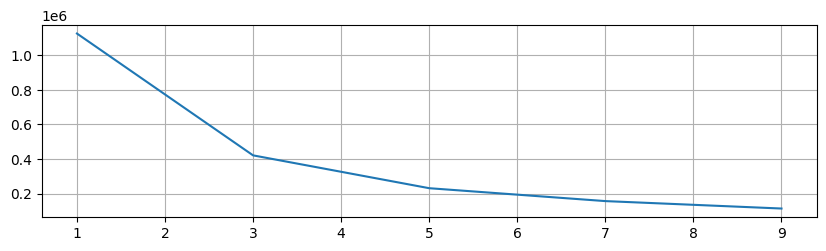

In [ ]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

X = df
distorsions = []
for k in range(1,10,2):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 2.5))
plt.plot(range(1,10,2), distorsions)
plt.grid(True)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3)
km
y_predicted = km.fit_predict(df[['home_team','away_team']])
y_predicted

In [ ]:
df['cluster'] = y_predicted
df

,home_team,away_team,home_score,cluster
0,France,Croatia,4,2
1,Belgium,England,2,2
2,Croatia,England,2,2
3,France,Belgium,1,2
4,Sweden,England,0,1
...,...,...,...,...
895,Argentina,France,1,2
896,Yugoslavia,Brazil,2,1
897,Romania,Peru,3,1
898,United States,Belgium,3,1


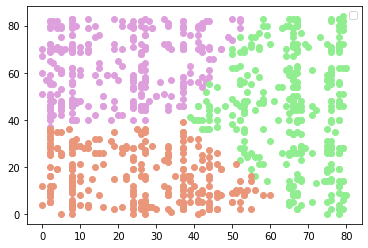

In [ ]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
plt.scatter(df0.home_team,df0['away_team'], color='plum')
plt.scatter(df1.home_team,df1['away_team'], color='lightgreen')
plt.scatter(df2.home_team,df2['away_team'], color='darksalmon')
plt.legend()